In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from random import randint
from sklearn.metrics import accuracy_score

In [37]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [38]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [39]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
train_df.shape

(891, 12)

In [41]:
X = train_df.drop(columns=["Survived", "Name", "Sex", "Ticket", "Cabin", "Embarked"])

In [42]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          714 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [43]:
y = train_df['Survived']

In [44]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [45]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [47]:
train_df.groupby('Survived').mean()

/var/folders/nd/q79n0hd51vqcq6swmwgkc95w0000gn/T/ipykernel_43500/2966032617.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_df.groupby('Survived').mean()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(891, 6) (757, 6) (134, 6)


In [50]:
print(y.shape, y_train.shape, y_test.shape)

(891,) (757,) (134,)


In [51]:
print(y.mean(), y_train.mean(), y_test.mean())

0.3838383838383838 0.37780713342140027 0.417910447761194


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15, 
                                                    stratify = y,
                                                    random_state=42)

##### Stratify is used to return the equal proportions for the class labels of y

In [53]:
print(y.mean(), y_train.mean(), y_test.mean())

0.3838383838383838 0.3844121532364597 0.3805970149253731


In [54]:
print(X.mean(), X_train.mean(), X_test.mean())

PassengerId    446.000000
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64 PassengerId    444.726552
Pclass           2.305152
Age             29.761363
SibSp            0.505945
Parch            0.384412
Fare            31.612147
dtype: float64 PassengerId    453.194030
Pclass           2.328358
Age             29.338095
SibSp            0.619403
Parch            0.365672
Fare            35.548911
dtype: float64


In [60]:
x_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])

In [61]:
x_binarised_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare
400,1,0,1,1,1,1
122,1,1,1,1,1,1
358,1,0,NaN,1,1,1
626,0,1,0,1,1,1
874,0,1,1,1,1,1
...,...,...,...,...,...,...
537,0,1,1,1,1,1
736,0,0,0,1,1,1
462,0,1,0,1,1,1
347,1,0,NaN,1,1,1


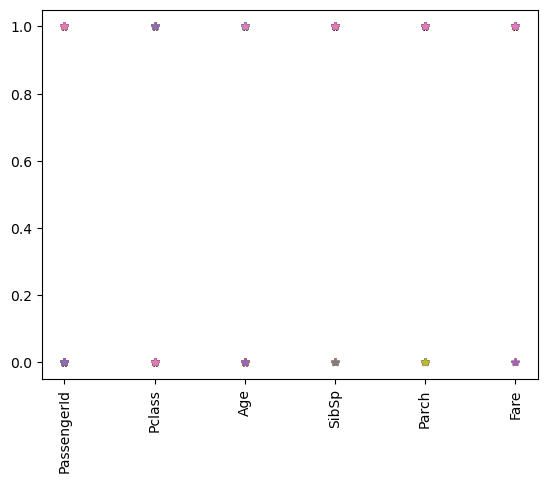

In [62]:
plt.plot(x_binarised_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [63]:
x_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

In [64]:
x_binarised_test = x_binarised_test.values
x_binarised_train = x_binarised_train.values

In [65]:
type(x_binarised_train), type(x_binarised_test)

(numpy.ndarray, numpy.ndarray)

In [71]:
b = 3

i = randint(0, x_binarised_train.shape[0])

print("For row", i)

if (np.sum(x_binarised_train[100, :]) >= b):
    print("MP Neuron inference is Survived")
else:
    print("MP Neuron inference is Not Survived")

if (y_train[i] == 1):
    print("Ground Truth is Survived")
else:
    print("Ground truth is Not Survived")

For row 524
MP Neuron inference is Survived
Ground truth is Not Survived


In [72]:
b = 3

y_pred_train = []
accurate_rows = 0

for x, y in zip(x_binarised_train, y_train):
    y_pred = (np.sum(x) >= b)
    y_pred_train.append(y_pred)
    accurate_rows += (y == y_pred)

print(accurate_rows, accurate_rows/x_binarised_train.shape[0])

349 0.4610303830911493


In [73]:
for b in range(x_binarised_train.shape[1] + 1):
    y_pred_train = []
    accurate_rows = 0

    for x, y in zip(x_binarised_train, y_train):
        y_pred = (np.sum(x) >= b)
        y_pred_train.append(y_pred)
        accurate_rows += (y == y_pred)

    print(b, accurate_rows, accurate_rows/x_binarised_train.shape[0])

0 347 0.4583883751651255
1 347 0.4583883751651255
2 347 0.4583883751651255
3 349 0.4610303830911493
4 370 0.48877146631439894
5 445 0.5878467635402906
6 483 0.6380449141347424


In [82]:
b = 6

y_pred_test = []

for x in x_binarised_test:
    y_pred = (np.sum(x) >= b)
    y_pred_test.append(y_pred)
    
accuracy = accuracy_score(y_pred_test, y_test)
print(b,accuracy)

6 0.6492537313432836


In [83]:
class MPNeuron:
    
    def __init__(self):
        self.b = None
    
    def model(self, x):
        return(sum(x) >= self.b)
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y):
        accuracy = {}
        
        for b in range(X.shape[1] + 1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y_pred, Y)
        
        best_b = max(accuracy,key = accuracy.get)
        self.b = best_b
        
        print('Optimal Value of  is', best_b)
        print('Highest accuracy is',accuracy[best_b])

In [84]:
mp_neuron = MPNeuron()
mp_neuron.fit(x_binarised_train, y_train)

Optimal Value of  is 6
Highest accuracy is 0.6380449141347424


In [85]:
Y_test_pred = mp_neuron.predict(x_binarised_test)
accuracy_test = accuracy_score(Y_test_pred, y_test)

In [86]:
print(accuracy_test)

0.6492537313432836
